In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [20]:
# Count unique classes in y_train
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Unique classes in y_train:", unique_classes)
print("Counts for each class:", counts)

Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Counts for each class: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [21]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

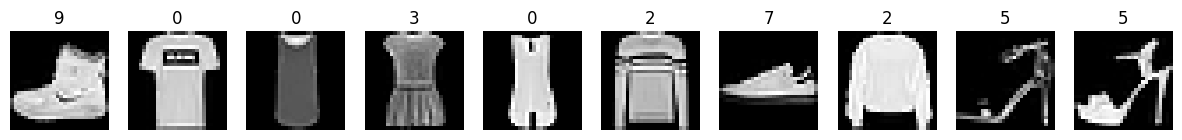

In [22]:
figure, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(X_train[i], cmap="gray")
    axes[i].set_title(np.argmax(y_train[i]))
    axes[i].axis("off")
plt.show()

In [23]:
# cnn
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


c:\Users\rawan\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5995 - loss: 1.1258 - val_accuracy: 0.8209 - val_loss: 0.4970
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7820 - loss: 0.6104 - val_accuracy: 0.8300 - val_loss: 0.4587
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8049 - loss: 0.5493 - val_accuracy: 0.8453 - val_loss: 0.4200
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8131 - loss: 0.5244 - val_accuracy: 0.8561 - val_loss: 0.4000
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8156 - loss: 0.5093 - val_accuracy: 0.8618 - val_loss: 0.3961
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8279 - loss: 0.4823 - val_accuracy: 0.8568 - val_loss: 0.3816
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8258 - loss: 0.4855 - val_accuracy: 0.8606 - val_loss: 0.3734
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8345 - loss: 0.4687 - 

In [27]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8656 - loss: 0.3789
Test loss: 0.39315736293792725
Test accuracy: 0.8615000247955322


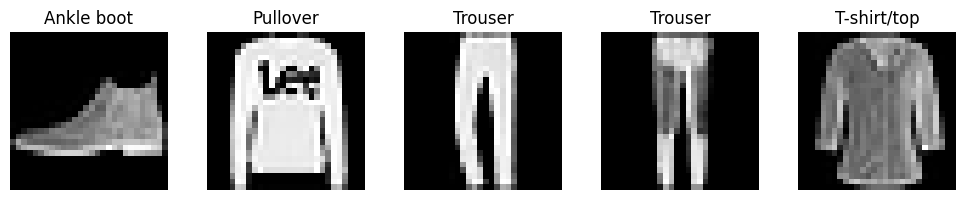

In [ ]:
# Display top 5 predicted images with their labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"{class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()